In [1]:
import csv 
import os
import numpy as np
import pickle 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.integrate import odeint
import math

## DMD with input

In [2]:
def calc_Input_Koopman(Yf,Yp,Up,X):
    # Yf and Yp and Up have each column reserved for observable and each row for time
    
    V = np.vstack((Yf,X)) @ np.transpose(np.vstack((Yp, Up)))
    G = np.vstack((Yp,Up)) @ np.transpose(np.vstack((Yp,Up)))
    M = V @ np.linalg.pinv(G)
    
    return M;

# trp pathway ODEs

In [3]:
def S(conc):
    
    S = 1/(1+np.exp(-conc))
    
    return S

numRates = 52
k = np.random.normal(loc=0.3,scale=0.09,size=numRates)
k[40:52] = k[40:52]/(2160.0)
# k[40:52] = k[40:52]/(21600.0)
def trp(x,t):
    
    # define constants
    h2o = 5
    glu = 5
    pyr = 5
    hplus = 5
    dip = 5
    co2 = 5
    
    # rename states
    cha = x[0]
    gln = x[1]
    anth = x[2]
    fivepa = x[3]
    nfivepa = x[4]
    onetwoc = x[5]
    onetwosr = x[6]
    ind = x[7]
    ser = x[8]
    trp = x[9]
    e1 = x[10]
    e2 = x[11]
    e3 = x[12]
    e4 = x[13]
    e5 = x[14]
    e6 = x[15]
    cha_e1 = x[16]
    gln_e1 = x[17]
    anth_e2 = x[18]
    fivepa_e2 = x[19]
    nfivepa_e3 = x[20]
    onetwoc_e4 = x[21]
    onetwosr_e5 = x[22]
    ind_e6 = x[23]
    ser_e6 = x[24]
    dg3p = x[25]
    trpR = x[26]
    trp_trpR = x[27]
    gRNA1 = x[28]
    gRNA2 = x[29]
    gRNA3 = x[30]
    gRNA4 = x[31]
    gRNA5 = x[32]
    gRNA6 = x[33]
    gRNA1_dCas9 = x[34]
    gRNA2_dCas9 = x[35]
    gRNA3_dCas9 = x[36]
    gRNA4_dCas9 = x[37]
    gRNA5_dCas9 = x[38]
    gRNA6_dCas9 = x[39]
    dCas9 = x[40]
    
    a = 0.5
    kg = 0.5
    kt = 0.5
    a1 = a/(1+(gRNA1_dCas9)/kg+(trp_trpR)/kt) # production rates of enzymes
    a2 = a/(1+(gRNA2_dCas9)/kg+(trp_trpR)/kt)
    a3 = a/(1+(gRNA3_dCas9)/kg+(trp_trpR)/kt)
    a4 = a/(1+(gRNA4_dCas9)/kg+(trp_trpR)/kt)
    a5 = a/(1+(gRNA5_dCas9)/kg+(trp_trpR)/kt)
    a6 = a/(1+(gRNA6_dCas9)/kg+(trp_trpR)/kt)
    de = 1
    aR = 0.5
    dR = 0.5
    ag = 0.5
    dg = 0.5
    ad = 0.5
    dd = 0.5
    
    dcha = (-k[0]*cha*gln-k[1]*cha*e1+k[2]*cha_e1-k[7]*cha*gln_e1)
    dgln = (-k[0]*cha*gln-k[3]*gln*e1+k[4]*gln_e1-k[6]*cha_e1*gln)
    danth = (k[0]*cha*gln+k[5]*cha_e1*gln_e1*k[6]*cha_e1*gln+k[7]*cha*gln_e1-k[8]*
            anth*fivepa-k[9]*anth*e2+k[10]*anth_e2-k[15]*anth*fivepa_e2)
    dfivepa = (-k[8]*anth*fivepa-k[11]*fivepa*e2+k[12]*fivepa_e2-k[14]*anth_e2*fivepa)
    dnfivepa = (k[8]*anth*nfivepa+k[13]*anth_e2*fivepa_e2+k[14]*anth_e2*fivepa+k[15]
               *anth*fivepa_e2-k[16]*nfivepa-k[17]*nfivepa*e3+k[19]*nfivepa_e3)
    donetwoc = (k[16]*nfivepa+k[19]*nfivepa_e3-k[20]*onetwoc*hplus-k[21]*onetwoc*e4+k[22]
               *onetwoc_e4)
    donetwosr = (-k[24]*onetwosr+k[25]*dg3p*ind-k[26]*onetwosr*e5+k[27]*onetwosr_e5)
    dind = (-k[25]*onetwosr+k[25]*dg3p*ind+k[28]*onetwosr_e5-k[29]*e5*dg3p*ind-k[30]*ind
           *ser-k[31]*ind*e6+k[32]*ind_e6-k[37]*ind*ser_e6)
    dser = (-k[30]*ind*ser - k[33]*ser*e6+k[34]*ser_e6-k[36]*ind_e6*ser)
    dtrp = (k[30]*ind*ser+k[35]*ind_e6*ser_e6+k[36]*ind_e6*ser+k[37]*ind*ser_e6)
    de1 = (-k[0]*cha*e1+k[2]*cha_e1-k[3]*gln*e1+k[4]*gln_e1+k[5]*cha_e1*gln_e1+k[6]
          *cha_e1*gln+k[7]*cha*gln_e1+a1-S(trp)*trp-de*e1)
    de2 = (-k[9]*anth_e2+k[10]*anth_e2-k[11]*fivepa*e2+k[12]*fivepa_e2+k[13]*anth_e2
          *fivepa_e2+k[14]*anth_e2*fivepa+k[15]*anth*fivepa_e2+a2-S(trp)*trp-de*e2)
    de3 = (-k[17]*nfivepa*e3+k[18]*nfivepa_e3+k[19]*nfivepa*e3+a3-S(trp)*trp-de*e3)
    de4 = (-k[21]*onetwoc*e4+k[22]*onetwoc_e4+k[23]*onetwoc_e4*hplus+a4-S(trp)*trp-de*e4)
    de5 = (-k[26]*onetwosr*e5+k[27]*onetwosr_e5+k[28]*onetwosr_e5+a5-S(trp)*trp-de*e5)
    de6 = (-k[32]*ind*e6+k[32]*ind_e6-k[33]*ser*e6+k[34]*ser_e6+k[35]*ind_e6*ser_e6
           +k[36]*ind_e6*ser+k[37]*ind*ser_e6+a6-S(trp)*trp-de*e6)
    dcha_e1 = (k[1]*cha*e1-k[2]*cha_e1-k[5]*cha_e1*gln_e1-k[6]*cha_e1*gln)
    dgln_e1 = (k[3]*gln*e1-k[4]*gln_e1-k[5]*cha_e1*gln_e1-k[7]*cha*gln_e1)
    danth_e2 = (k[9]*anth*e2-k[10]*anth_e2-k[13]*anth_e2*fivepa_e2-k[14]*anth_e2*fivepa)
    dfivepa_e2 = (k[11]*fivepa*e2-k[12]*fivepa_e2-k[13]*anth_e2*fivepa_e2-k[15]*anth
                  *fivepa_e2)
    dnfivepa_e3 = (k[17]*nfivepa*e3-k[18]*nfivepa_e3-k[19]*nfivepa_e3)
    donetwoc_e4 = (k[21]*onetwoc*e4-k[22]*onetwoc_e4-k[23]*onetwoc_e4*hplus)
    donetwosr_e5 = (k[26]*onetwosr*e5-k[27]*onetwosr_e5-k[28]*onetwosr_e5+k[29]*e5*dg3p*ind)
    dind_e6 = (k[31]*ind*e6-k[32]*ind_e6-k[35]*ind_e6*ser_e6-k[36]*ind*ser_e6)
    dser_e6 = (k[33]*ser*e6 - k[34]*ser_e6-k[35]*ind_e6*ser_e6-k[37]*ind*ser_e6)
    ddg3p = k[28]*onetwosr_e5+k[24]*onetwosr-k[25]*dg3p*ind-0.5*dg3p
    dtrpR = -k[38]*trpR*trp+k[39]*trp_trpR+aR-dR*trpR
    dtrp_trpR = k[38]*trpR*trp-k[39]*trp_trpR
    dgRNA1 = -k[40]*gRNA1*dCas9+k[41]*gRNA1_dCas9+ag-dg*gRNA1
    dgRNA2 = -k[42]*gRNA2*dCas9+k[43]*gRNA2_dCas9+ag-dg*gRNA2
    dgRNA3 = -k[44]*gRNA3*dCas9+k[45]*gRNA3_dCas9+ag-dg*gRNA3
    dgRNA4 = -k[46]*gRNA4*dCas9+k[47]*gRNA4_dCas9+ag-dg*gRNA4
    dgRNA5 = -k[48]*gRNA5*dCas9+k[49]*gRNA5_dCas9+ag-dg*gRNA5
    dgRNA6 = -k[50]*gRNA6*dCas9+k[51]*gRNA6_dCas9+ag-dg*gRNA6
    dgRNA1_dCas9 = k[40]/5*gRNA1*dCas9-k[41]*gRNA1_dCas9 
    dgRNA2_dCas9 = k[42]/5*gRNA2*dCas9-k[43]*gRNA2_dCas9 
    dgRNA3_dCas9 = k[44]/5*gRNA3*dCas9-k[45]*gRNA3_dCas9 
    dgRNA4_dCas9 = k[46]/5*gRNA4*dCas9-k[47]*gRNA4_dCas9 
    dgRNA5_dCas9 = k[48]/5*gRNA5*dCas9-k[49]*gRNA5_dCas9 
    dgRNA6_dCas9 = k[50]/5*gRNA6*dCas9-k[51]*gRNA6_dCas9 
    ddCas9 = (k[41]*gRNA1_dCas9+k[43]*gRNA2_dCas9+k[45]*gRNA3_dCas9+k[47]*gRNA4_dCas9+
             k[49]*gRNA5_dCas9+k[51]*gRNA6_dCas9-k[40]*gRNA1*dCas9-k[42]*gRNA2*dCas9
              -k[44]*gRNA3*dCas9-k[46]*gRNA4*dCas9-k[48]*gRNA5*dCas9-k[50]*gRNA6*dCas9
              +ad-dd*dCas9)
    
    return ([dcha,dgln,danth,dfivepa,dnfivepa,donetwoc,donetwosr,dind,dser,dtrp,de1,de2,de2,\
          de4,de5,de6,dcha_e1,dgln_e1,danth_e2,dfivepa_e2,dnfivepa_e3,donetwoc_e4,\
          donetwosr_e5,dind_e6,dser_e6,ddg3p,dtrpR,dtrp_trpR,dgRNA1,dgRNA2,dgRNA3,\
            dgRNA4,dgRNA5,dgRNA6,dgRNA1_dCas9,dgRNA2_dCas9,dgRNA3_dCas9,dgRNA4_dCas9,\
            dgRNA5_dCas9,dgRNA6_dCas9,ddCas9])
    

# solve the ODEs

In [4]:
numStates = 41

# IC = 0.1*np.ones(numStates)
IC = np.random.normal(loc=0.15,scale=0.02,size=numStates)   
IC[34:40] = 0.0
IC[40] = 10*IC[40]
IC[28:34] = 100*IC[28:34]
tStart = 0.0
tEnd = 200
Nt = tEnd*10
tSpan = np.linspace(tStart,tEnd,Nt)

x_states = odeint(trp,IC,tSpan)
u_inputs = x_states[:,28:]
x_states = x_states[:,0:28] 

x_cha = x_states[:,0]
x_gln = x_states[:,1]
x_anth = x_states[:,2]
x_fivepa = x_states[:,3]
x_nfivepa = x_states[:,4]
x_onetwoc = x_states[:,5]
x_onetwosr = x_states[:,6]
x_ind = x_states[:,7]
x_ser = x_states[:,8]
x_trp = x_states[:,9]
x_e1 = x_states[:,10]
x_e2 = x_states[:,11]
x_e3 = x_states[:,12]
x_e4 = x_states[:,13]
x_e5 = x_states[:,14]
x_e6 = x_states[:,15]
x_cha_e1 = x_states[:,16]
x_gln_e1 = x_states[:,17]
x_anth_e2 = x_states[:,18]
x_fivepa_e2 = x_states[:,19]
x_nfivepa_e3 = x_states[:,20]
x_onetwoc_e4 = x_states[:,21]
x_onetwosr_e5 = x_states[:,22]
x_ind_e6 = x_states[:,23]
x_ser_e6 = x_states[:,24]
x_dg3p = x_states[:,25]
x_trpR = x_states[:,26]
x_trp_trpR = x_states[:,27]
u_gRNA1 = u_inputs[:,0]
u_gRNA2 = u_inputs[:,1]
u_gRNA3 = u_inputs[:,2]
u_gRNA4 = u_inputs[:,3]
u_gRNA5 = u_inputs[:,4]
u_gRNA6 = u_inputs[:,5]
u_gRNA1_dCas9 = u_inputs[:,6]
u_gRNA2_dCas9 = u_inputs[:,7]
u_gRNA3_dCas9 = u_inputs[:,8]
u_gRNA4_dCas9 = u_inputs[:,9]
u_gRNA5_dCas9 = u_inputs[:,10]
u_gRNA6_dCas9 = u_inputs[:,11]
u_dCas9 = u_inputs[:,12]

for i in range(x_states.shape[0]):
    for j in range(x_states.shape[1]):
        if x_states[i,j] < -0.0001:
            print(str(i)+','+str(j)+'warning: there cannot be negative concentrations in states!')

    
for i in range(u_inputs.shape[0]):
    for j in range(u_inputs.shape[1]):
        if u_inputs[i,j] < -0.0001:
            print('warning: there cannot be negative concentrations in inputs!')
 
    

In [5]:
x_states[59,13]

0.2489639761100306

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


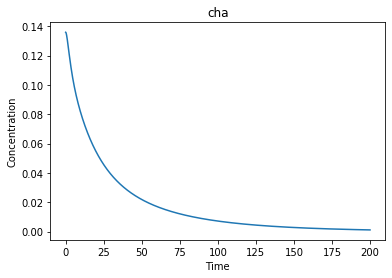

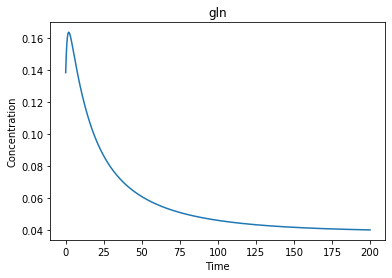

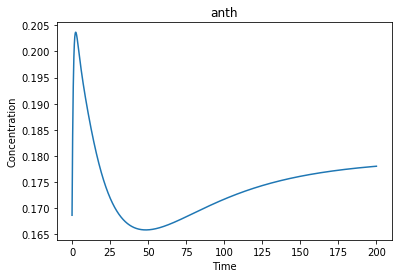

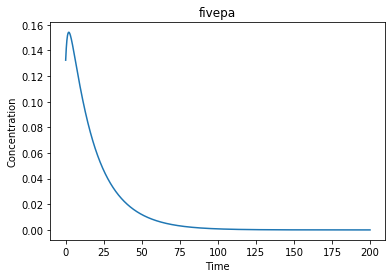

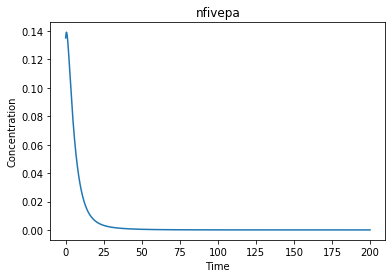

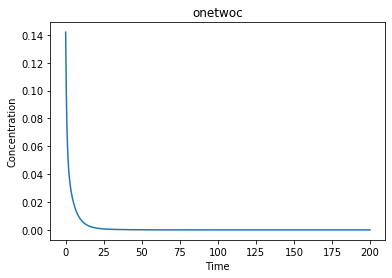

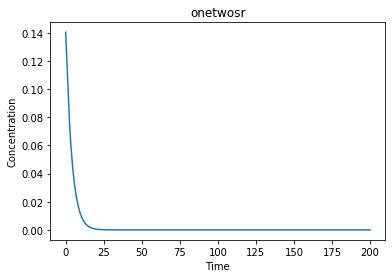

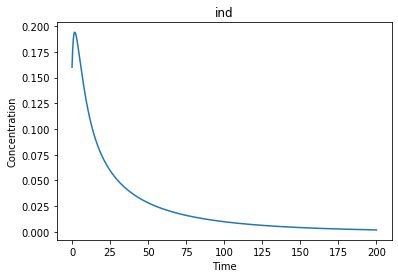

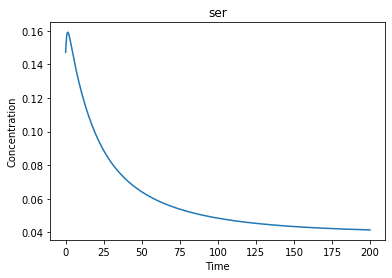

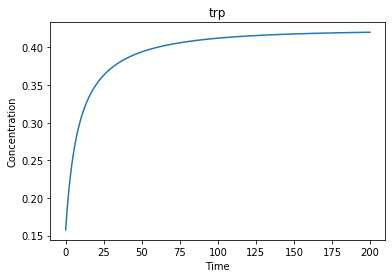

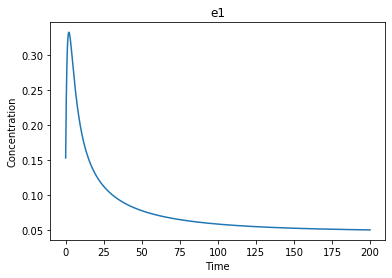

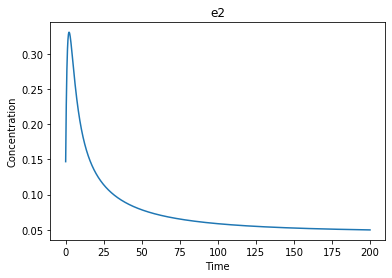

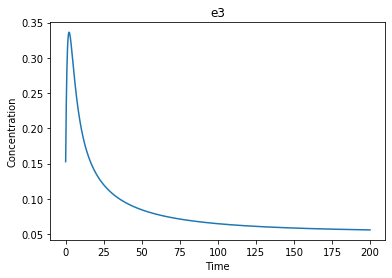

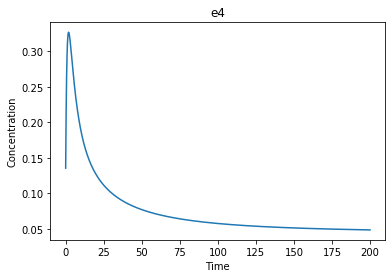

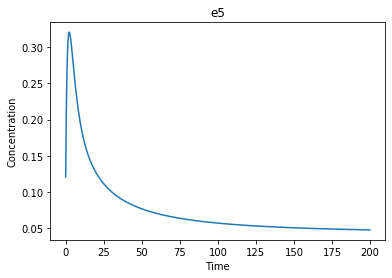

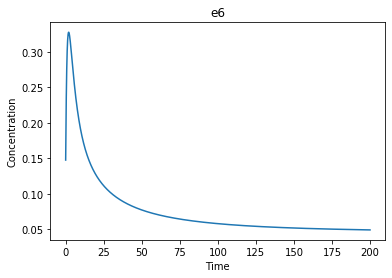

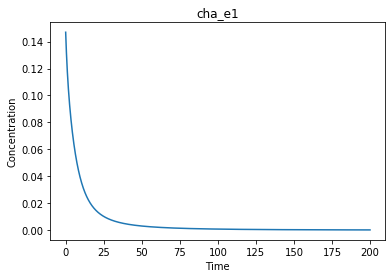

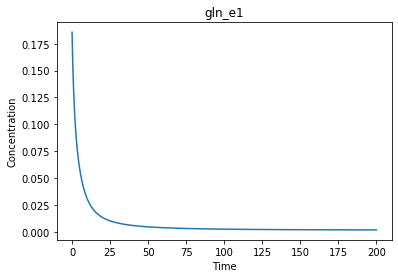

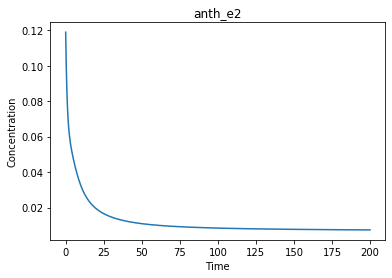

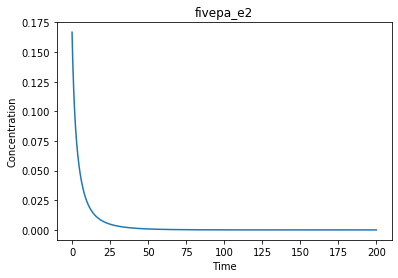

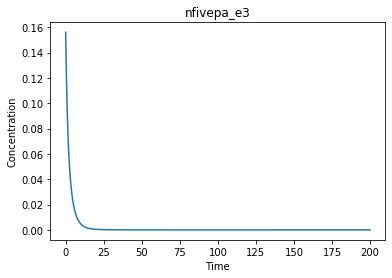

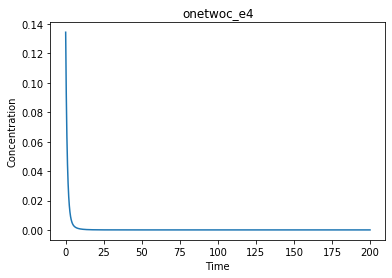

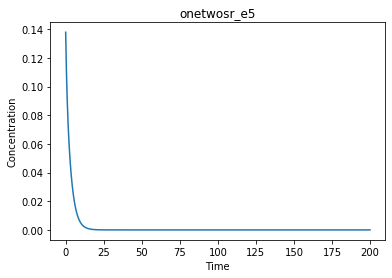

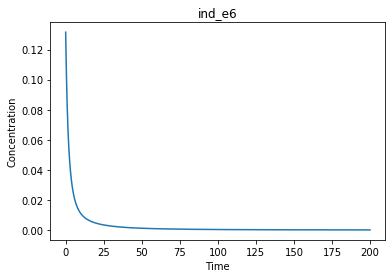

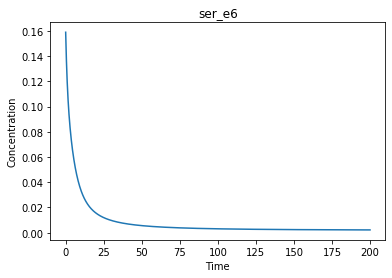

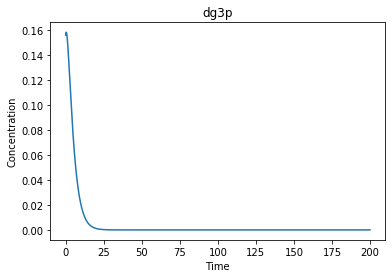

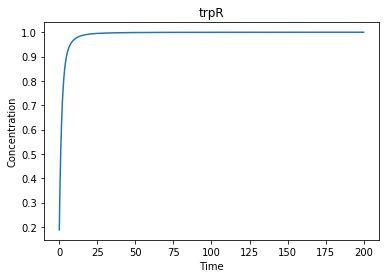

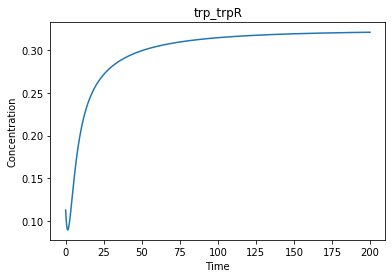

In [6]:
xlabels = ['cha','gln','anth','fivepa','nfivepa','onetwoc','onetwosr','ind','ser','trp',\
          'e1','e2','e3','e4','e5','e6','cha_e1','gln_e1','anth_e2','fivepa_e2',\
          'nfivepa_e3','onetwoc_e4','onetwosr_e5','ind_e6','ser_e6','dg3p','trpR','trp_trpR']

# plot concentration over time for all states
for i in range(0,x_states.shape[1]):
    plt.figure()
    plt.plot(tSpan,x_states[:,i])
    plt.xlabel('Time')
    plt.ylabel('Concentration')
#     plt.xlim([0,50])
#     plt.ylim([0,0.4])
    plt.title(xlabels[i])


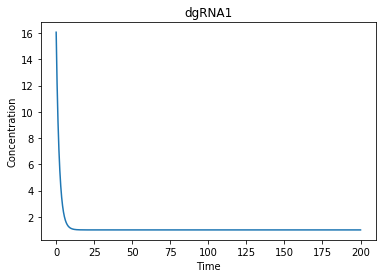

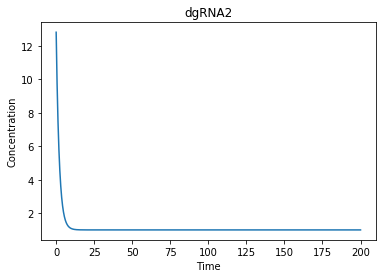

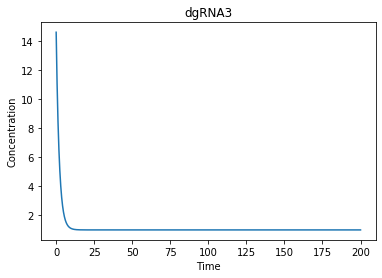

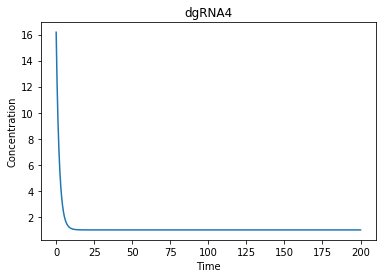

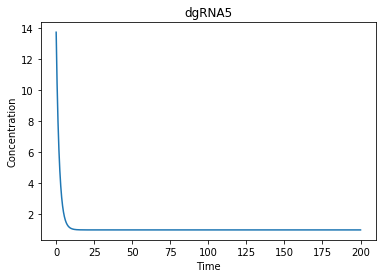

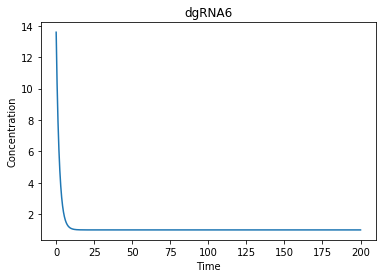

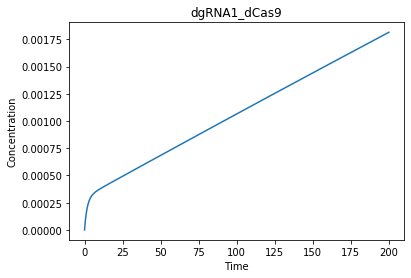

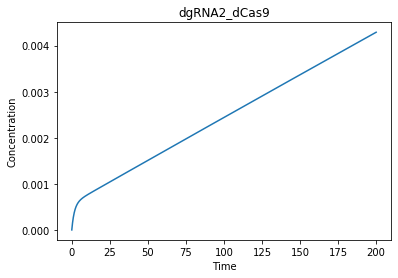

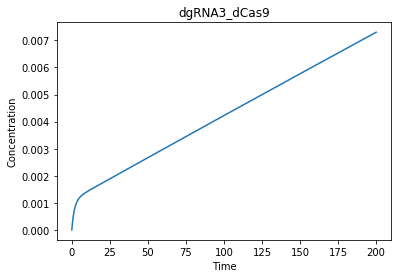

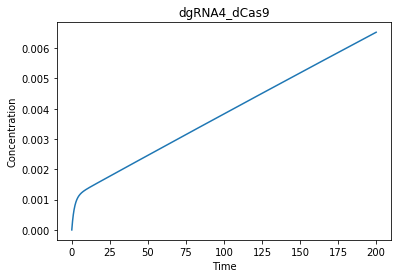

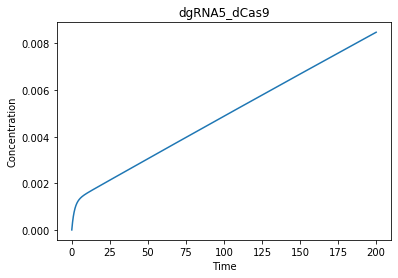

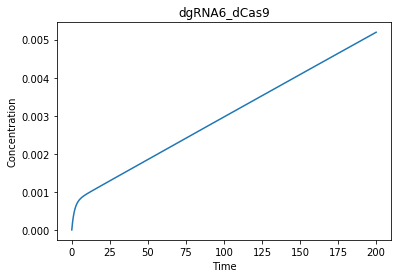

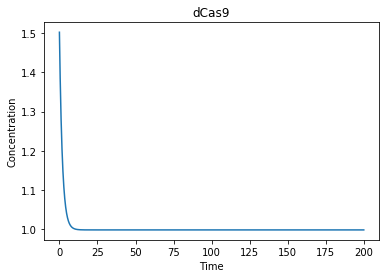

In [7]:
ulabels = ['dgRNA1','dgRNA2','dgRNA3','dgRNA4','dgRNA5','dgRNA6','dgRNA1_dCas9','dgRNA2_dCas9',\
           'dgRNA3_dCas9','dgRNA4_dCas9','dgRNA5_dCas9','dgRNA6_dCas9','dCas9']  

# plot concentration over time for all inputs
for i in range(0,u_inputs.shape[1]):
    plt.figure()
    plt.plot(tSpan,u_inputs[:,i])
    plt.xlabel('Time')
    plt.ylabel('Concentration')
#     plt.xlim([0,50])
#     plt.ylim([0,0.4])
    plt.title(ulabels[i])


## save data to pickle file

In [86]:
flag_koopman_data = 0
if flag_koopman_data == 1:
    Yp = x_states[0:x_states.shape[0]-1,:]
    Yf = x_states[1:x_states.shape[0],:]
    Up = u_inputs[0:u_inputs.shape[0]-1,6:12] # the actual inputs for Koopman DMD are only the gRNAi:dCas9 compound
    # Ypickle = np.zeros((2,x_states.shape[0]-1,x_states.shape[1]))
    # Ypickle[0] = Yp
    # Ypickle[1] = Yf
    pickle_out = open("deepDMD/koopman_data/trp_input1.pickle","wb")
    pickle.dump([Yp,Yf,Up], pickle_out)
    pickle_out.close()

flag_rr_ic_data = 0
if flag_rr_ic_data == 1:
    pickle_out2 = open('RRs_ICs_trp_input1.pickle','wb')
    pickle.dump([k,IC], pickle_out2)
    pickle_out2.close()

## DMD

In [117]:
print(np.transpose(PsiYf.shape))
print(np.transpose(Yp.shape))

[ 435 1999]
[1999   28]


In [137]:
PsiYp = build_monomial_dictionary(Yp,1)
PsiYf = build_monomial_dictionary(Yf,1)
# print(PsiYp.shape)
# print(PsiYp.shape)
K = calc_Input_Koopman(np.transpose(Yf),np.transpose(Yp),np.transpose(Up),np.transpose(Yp))
print(K.shape)

(56, 34)


In [139]:
K_x = K[0:Yp.shape[1],0:Yp.shape[1]]
print(K_x.shape)
K_u = K[0:Yp.shape[1],K_x.shape[1]:]
print(K_u.shape)

(28, 28)
(28, 6)


In [1]:
plt.figure()
sns.heatmap(K_x)
plt.figure()
sns.heatmap(K_u)

NameError: name 'plt' is not defined

In [141]:
pickle_out4= open("trp_Kx_Ku_1.pickle",'wb')
pickle.dump([K_x,K_u],pickle_out4)
pickle_out4.close()

In [5]:
Yp,Yf,Up = pickle.load(open('deepDMD/koopman_data/trp_input.pickle','rb'))
Kx,Ku = pickle.load(open('trp_Kx_Ku.pickle','rb'))

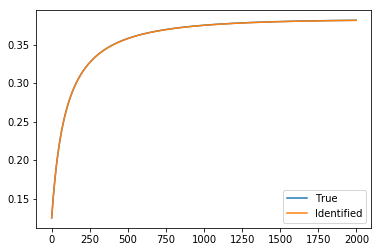

In [13]:
viz_Pred = 1

X_test = Yp
Y_test = Yf
U_test = Up

Psi_X_test = X_test
Psi_Y_test = Y_test
Psi_U_test = U_test

Psi_X_test = Psi_X_test.T
Psi_Y_test = Psi_Y_test.T
Psi_U_test = Psi_U_test.T

Psi_Y_Pred = np.dot(Kx,Psi_X_test) + np.dot(Ku,Psi_U_test)

numObservables = Psi_X_test.shape[0] 
obsInd = 9; # can vary from 1 to numObservables 

if viz_Pred:
    plt.figure()
    plt.plot(Psi_Y_test[obsInd,:]);
    plt.plot(Psi_Y_Pred[obsInd,:]);
    plt.gca().legend(('True','Identified'));

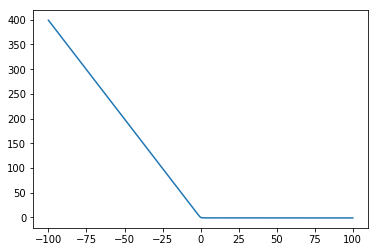

In [55]:
uplot = np.linspace(-100,100,200)
zplot = -(1+2*uplot) + np.sqrt(1+4*uplot**2)
plt.figure()
plt.plot(uplot,zplot);
# plt.ylim([-50,50])
# plt.xlim([-1,70])